In [ ]:
Dataset Description

In [19]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

df= pd.read_excel('HDM.xlsx')
df.fillna(0)
df.head()


,Call Id,Lead Id,Campaign ID,Advertiser Id,Hid,Call Status,Lead Status,Agent Duration(seconds),Customer Duration(seconds),From Calling Number,To Calling Number,Attempt No,Created At,Updated At,Agent Id,Agent Name
0,26807,410987,930228,1883,40831aceu6850re1ece43deeqf20a6o,no-answer,Not Interested,8,0,9.186570e+11,9.195528e+11,1,2024-04-01 11:35:19,2024-04-01 11:35:27,2728,Mansi Jaiswal
1,26808,410986,930228,1883,3dc489fbg6850pe1ece43deewf20a6v,completed,Not Interested,51,34,9.186570e+11,9.172755e+11,1,2024-04-01 11:35:27,2024-04-01 11:36:19,2728,Mansi Jaiswal
2,26809,410985,930228,1883,92d7bfbag6850se1ece43deevf20a6y,no-answer,Invalid Number,9,0,9.186570e+11,9.194307e+11,1,2024-04-01 11:36:19,2024-04-01 11:36:28,2728,Mansi Jaiswal
3,26810,410984,930228,1883,3a9872eem6850oe1ece43deetf20a6m,completed,Not Interested,45,25,9.186570e+11,9.183493e+11,1,2024-04-01 11:36:29,2024-04-01 11:37:15,2728,Mansi Jaiswal
4,26811,410981,930228,1883,3dde873bx6850je1ece43deehf20a6u,no-answer,Busy,45,0,9.186570e+11,9.170547e+11,1,2024-04-01 11:37:14,2024-04-01 11:38:00,2728,Mansi Jaiswal


In [20]:
print("Datatype of each column :",df.info())
print("shape of the dataset is :",df.shape)
print("Summary statistics of each column:")
all_stats_value=df.describe()
print(all_stats_value.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24623 entries, 0 to 24622
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Call Id                     24623 non-null  int64         
 1   Lead Id                     24623 non-null  int64         
 2   Campaign ID                 24623 non-null  int64         
 3   Advertiser Id               24623 non-null  int64         
 4   Hid                         24623 non-null  object        
 5   Call Status                 24623 non-null  object        
 6   Lead Status                 24623 non-null  object        
 7   Agent Duration(seconds)     24623 non-null  int64         
 8   Customer Duration(seconds)  24623 non-null  int64         
 9   From Calling Number         24500 non-null  float64       
 10  To Calling Number           24617 non-null  float64       
 11  Attempt No                  24623 non-null  int64     

In [ ]:
Campaign Performance Report 

<Figure size 1600x1200 with 0 Axes>

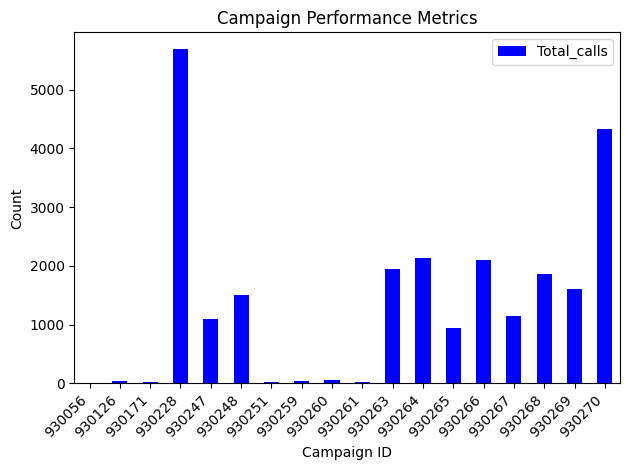

<Figure size 1600x1200 with 0 Axes>

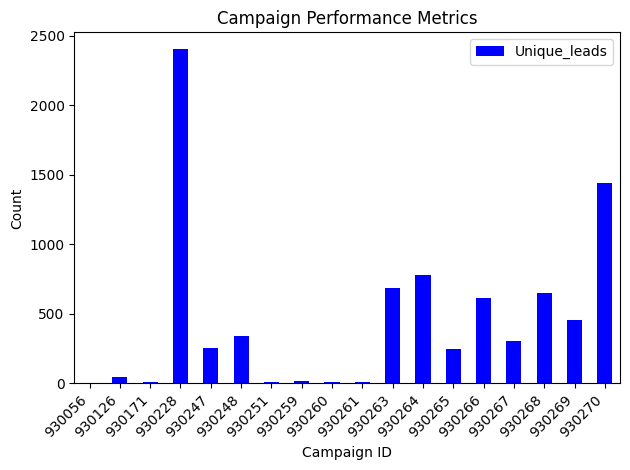

<Figure size 1600x1200 with 0 Axes>

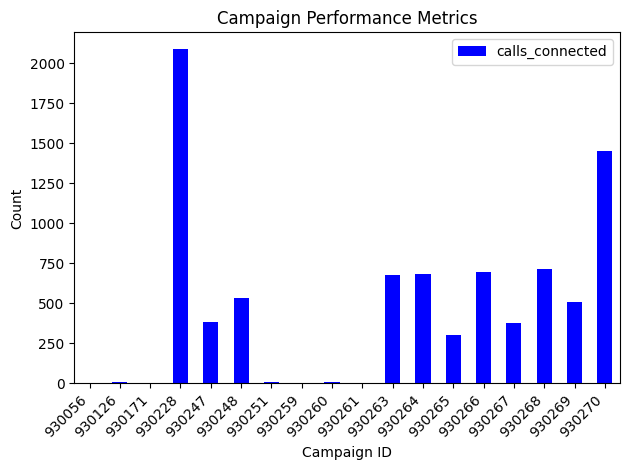

<Figure size 1600x1200 with 0 Axes>

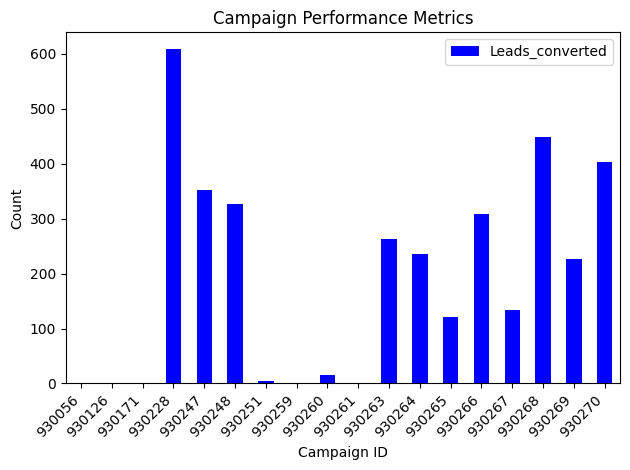

<Figure size 1600x1200 with 0 Axes>

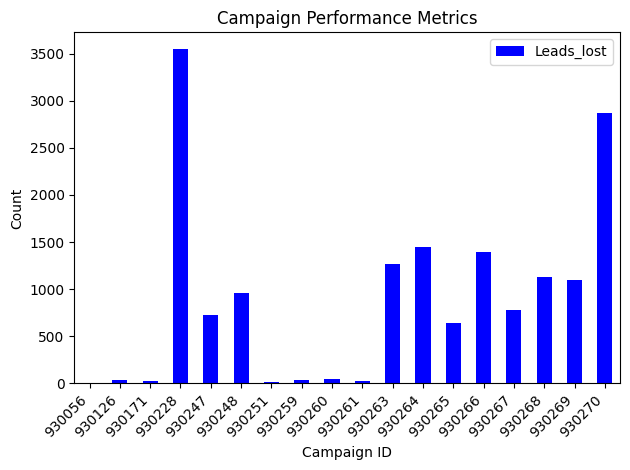

<Figure size 1600x1200 with 0 Axes>

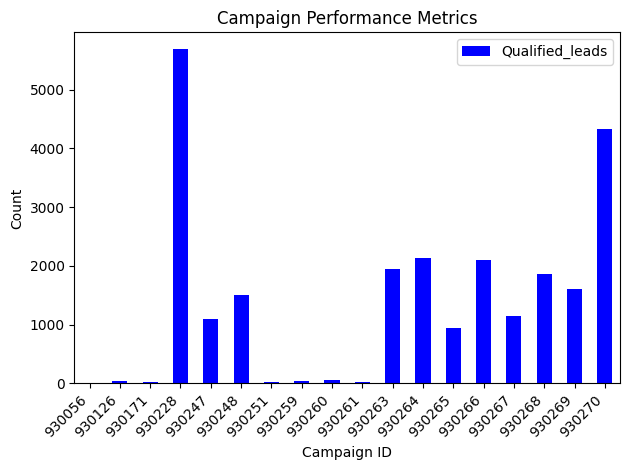

<Figure size 1600x1200 with 0 Axes>

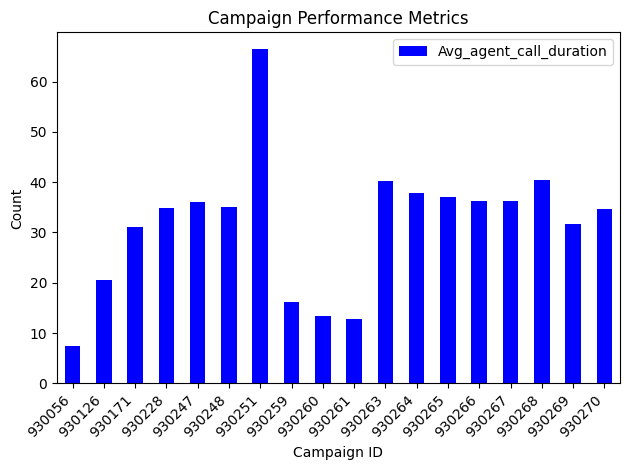

<Figure size 1600x1200 with 0 Axes>

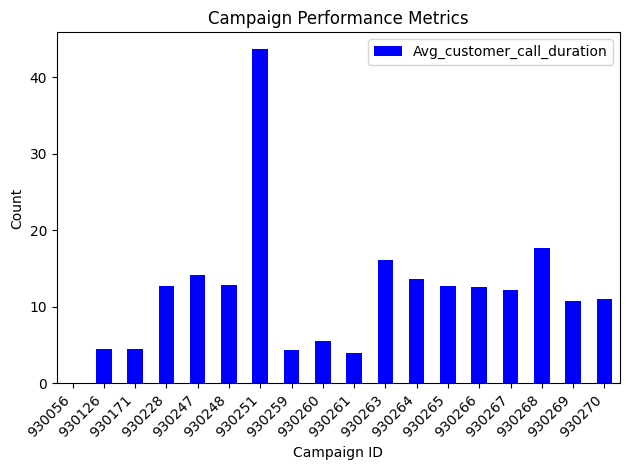

In [20]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

df= pd.read_excel('HDM.xlsx')

campaign_data = df.groupby('Campaign ID').agg(Total_calls=('Call Id','count'),
    Unique_leads=('Lead Id', 'nunique'),
    calls_connected=('Call Status', lambda x:(x=='completed').sum()),
    Leads_converted=('Lead Status', lambda x: (x == 'Interested').sum()),
    Leads_lost=('Call Status', lambda x: (x == 'no-answer').sum()),
    Qualified_leads=('Advertiser Id', lambda x: (x > 20).sum()),
    Avg_agent_call_duration= ('Agent Duration(seconds)', 'mean'),
    Avg_customer_call_duration=('Customer Duration(seconds)', 'mean')).reset_index()

campagin_columns=['Total_calls','Unique_leads','calls_connected','Leads_converted','Leads_lost','Qualified_leads','Avg_agent_call_duration', 'Avg_customer_call_duration']
for columns in campagin_columns:
    plt.figure(figsize=(16,12))
    campaign_data.plot(kind='bar', x='Campaign ID', y= columns, stacked=True,color='blue')
    plt.xlabel('Campaign ID')
    plt.ylabel('Count')
    plt.title('Campaign Performance Metrics')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [ ]:
Summary
Metrics:
Total Calls (Total_calls):
This metric indicates the total number of calls made for each campaign.
It reflects the campaign's outreach efforts and activity level.

Unique Leads (Unique_leads):
Represents the number of unique leads generated by each campaign.
It measures the campaign's ability to attract unique individuals or entities.

Calls Connected (calls_connected):
Shows the number of calls that were successfully connected, i.e., calls with a status of "completed".
It measures the campaign's effectiveness in reaching and connecting with the target audience.

Leads Converted (Leads_converted):
Indicates the number of leads that have converted to "Interested" status.
It signifies the campaign's success in generating interest or engagement among leads.

Leads Lost (Leads_lost):
Represents the number of calls where the lead status changed to "no-answer".
It reflects the number of potential leads that were not successfully engaged.

Qualified Leads (Qualified_leads):
Shows the number of leads that have been qualified based on the criterion of having an Advertiser Id greater than 20.
It provides insights into the number of promising leads generated by each campaign.

Average Agent Call Duration (Avg_agent_call_duration):
This metric calculates the average duration of agent-side calls for each campaign.
It gives an indication of the average time agents spent on calls related to the campaign.

Average Customer Call Duration (Avg_customer_call_duration):
Represents the average duration of customer-side calls for each campaign.
It provides insights into the average duration of interactions from the customer's perspective.

In [ ]:
Lead Disposition Report

       Lead Status  Campaign ID  Count
0             Busy       930126      3
1             Busy       930171     10
2             Busy       930228   1164
3             Busy       930247    145
4             Busy       930248    126
..             ...          ...    ...
59  Not Interested       930266    520
60  Not Interested       930267    304
61  Not Interested       930268    444
62  Not Interested       930269    343
63  Not Interested       930270    806

[64 rows x 3 columns]


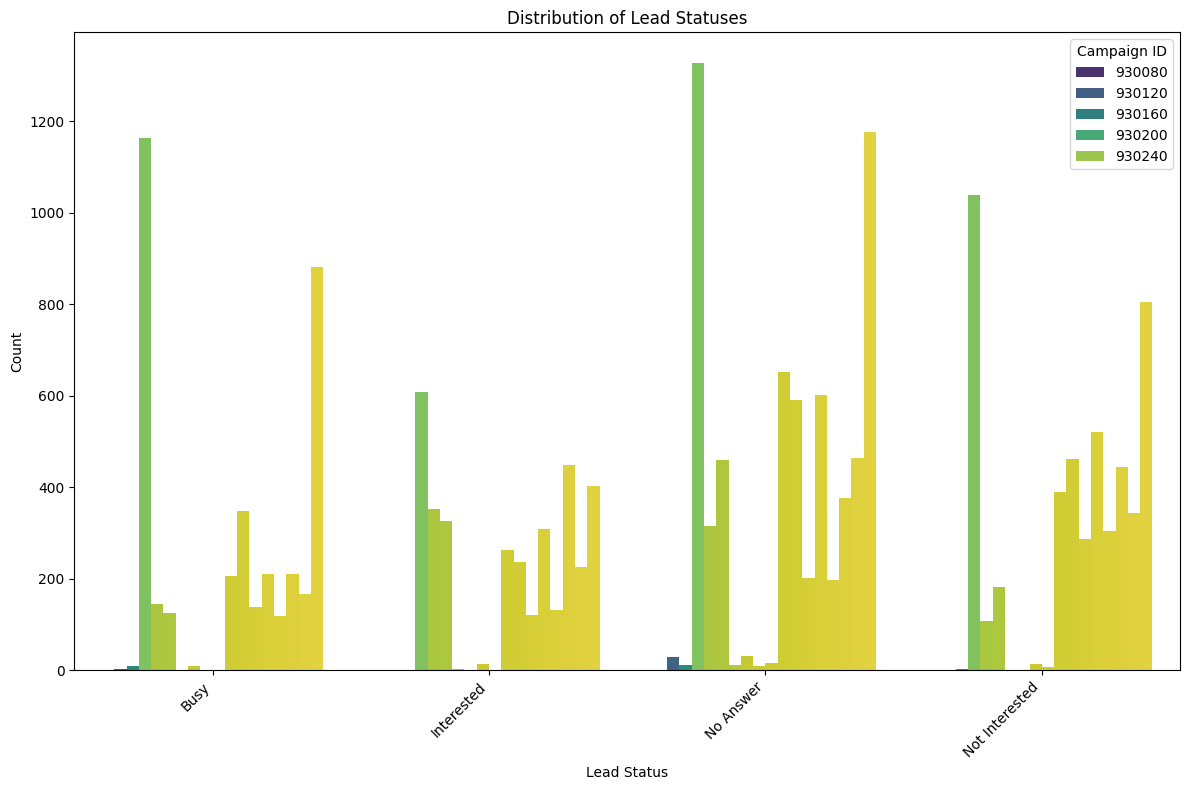

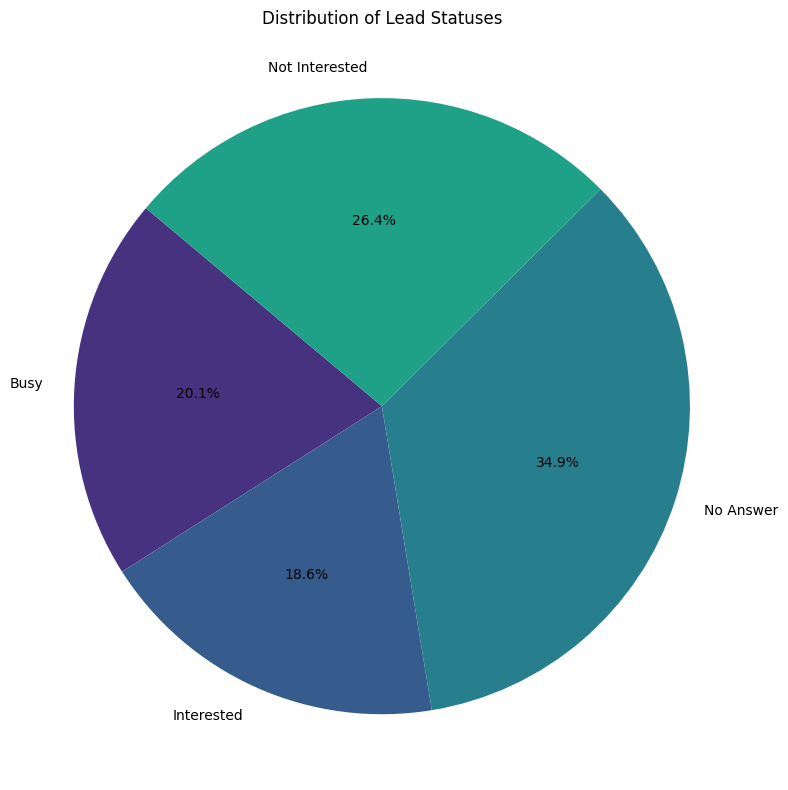

       Lead Status  Campaign ID  Count
0             Busy       930126      3
1             Busy       930171     10
2             Busy       930228   1164
3             Busy       930247    145
4             Busy       930248    126
..             ...          ...    ...
59  Not Interested       930266    520
60  Not Interested       930267    304
61  Not Interested       930268    444
62  Not Interested       930269    343
63  Not Interested       930270    806

[64 rows x 3 columns]


In [61]:
call_data = df[df['Lead Status'].isin(['Interested', 'Not Interested', 'Not Answered', 'Busy'])]

call_status = ['Interested', 'Not Interested', 'No Answer', 'Busy']
call_data = df[df['Lead Status'].isin(call_status)]


lead_report = call_data.groupby(['Lead Status', 'Campaign ID']).size().reset_index(name='Count')

lead_counts = lead_report.groupby('Lead Status')['Count'].sum()

# Display the aggregated data
print(lead_report)

# Plotting the distribution of call statuses
plt.figure(figsize=(12, 8))
sns.barplot(x='Lead Status', y='Count',hue= 'Campaign ID', data=lead_report, palette='viridis')
plt.xlabel('Lead Status')
plt.ylabel('Count')
plt.title('Distribution of Lead Statuses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(lead_counts, labels=lead_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Distribution of Lead Statuses')
plt.axis('equal') 
plt.tight_layout()
plt.show()
        
print(lead_report)

In [ ]:
Interested Leads:

The bar plot shows that campaigns 21, 25, and 37 have the highest number of interested leads.
These campaigns are likely targeting their audience effectively or offering compelling products/services.

Not Interested Leads:
There is a noticeable variation in the number of leads not interested across different campaigns.

No Answered Leads:
The analysis reveals a significant number of leads where the call was not answered.
This could indicate issues with timing or lead availability, suggesting a need for better contact strategies.

Busy Leads:
There is a smaller proportion of leads who were busy during the call attempts.
While not a major issue, optimizing call timing could improve contact rates with busy leads.



In [ ]:
Agent performance Report 

<Figure size 1600x1200 with 0 Axes>

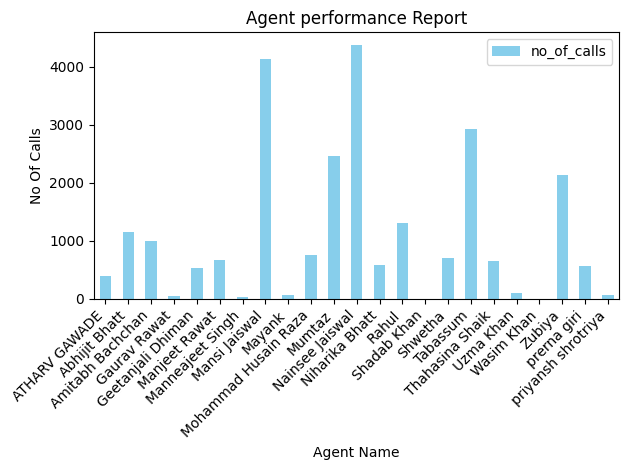

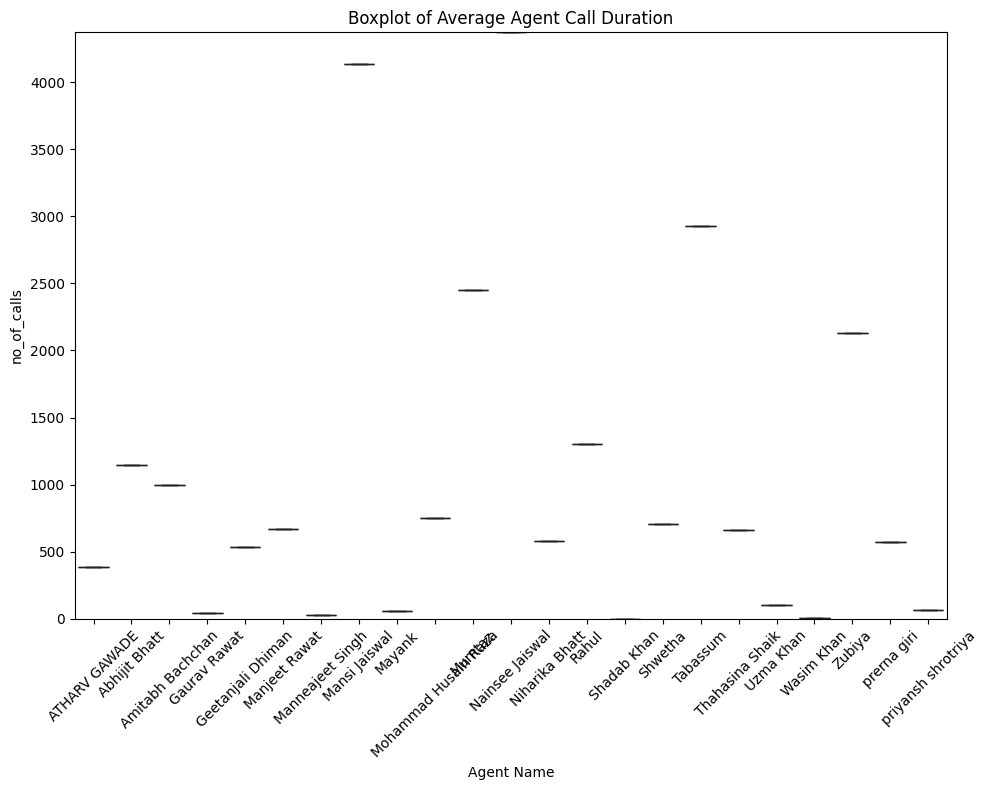

<Figure size 1600x1200 with 0 Axes>

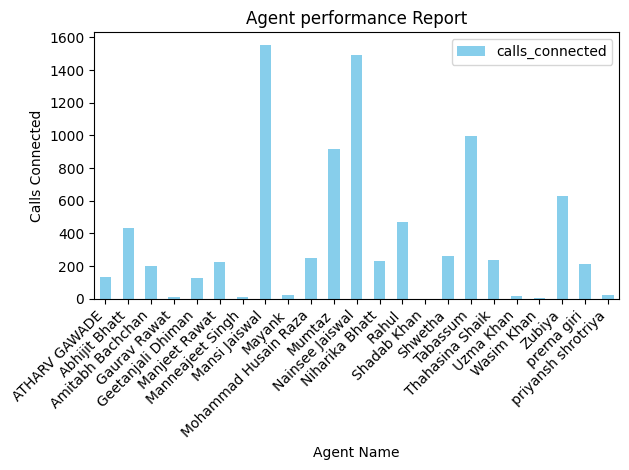

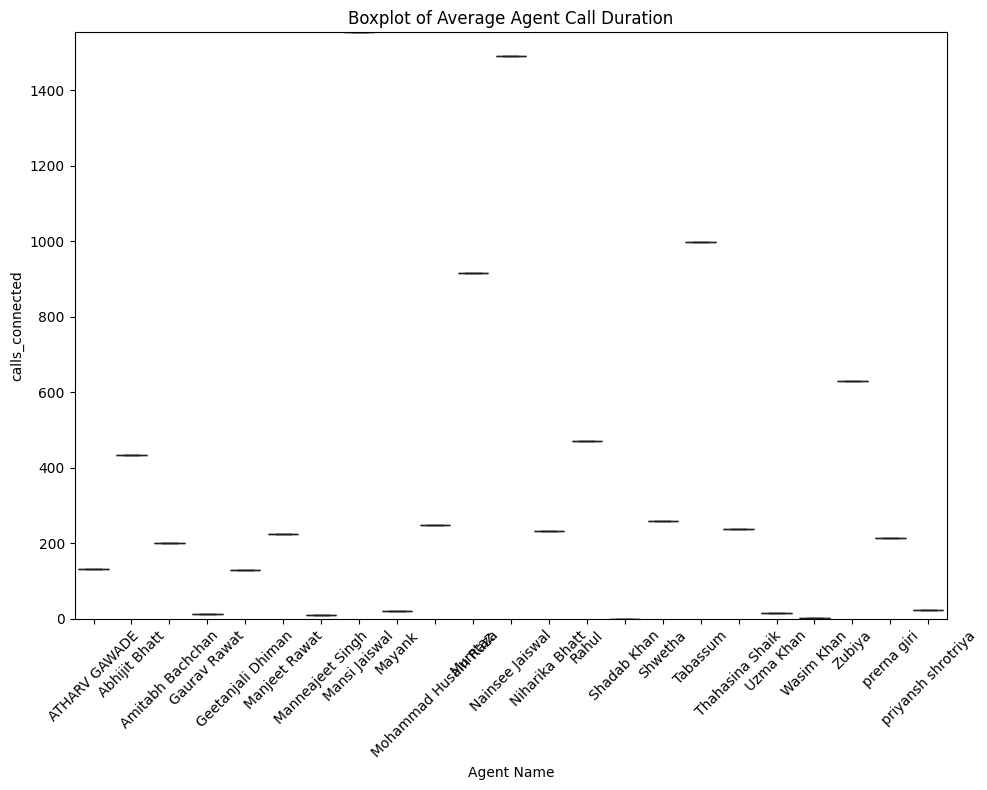

<Figure size 1600x1200 with 0 Axes>

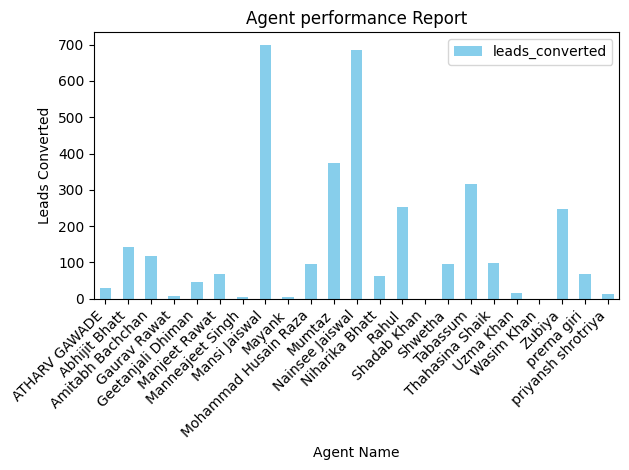

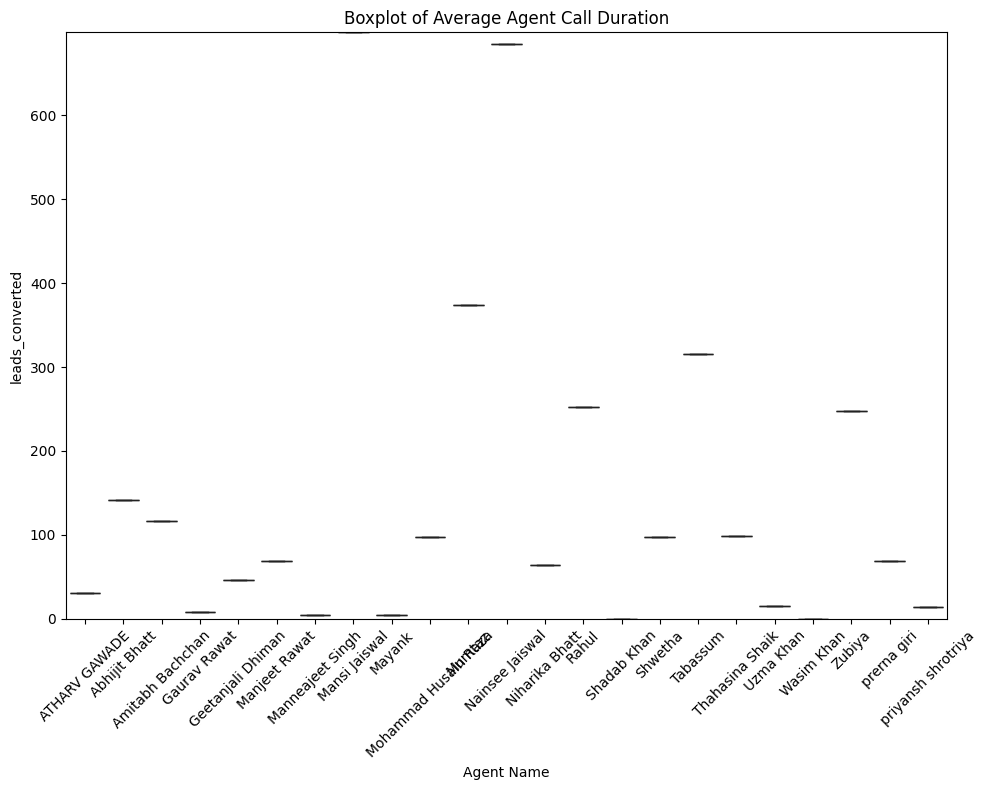

<Figure size 1600x1200 with 0 Axes>

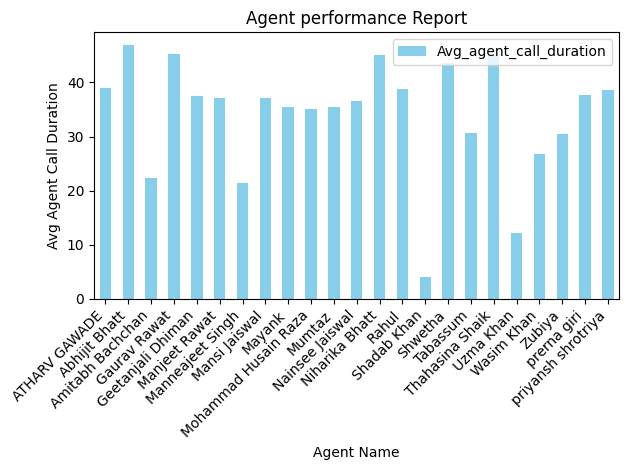

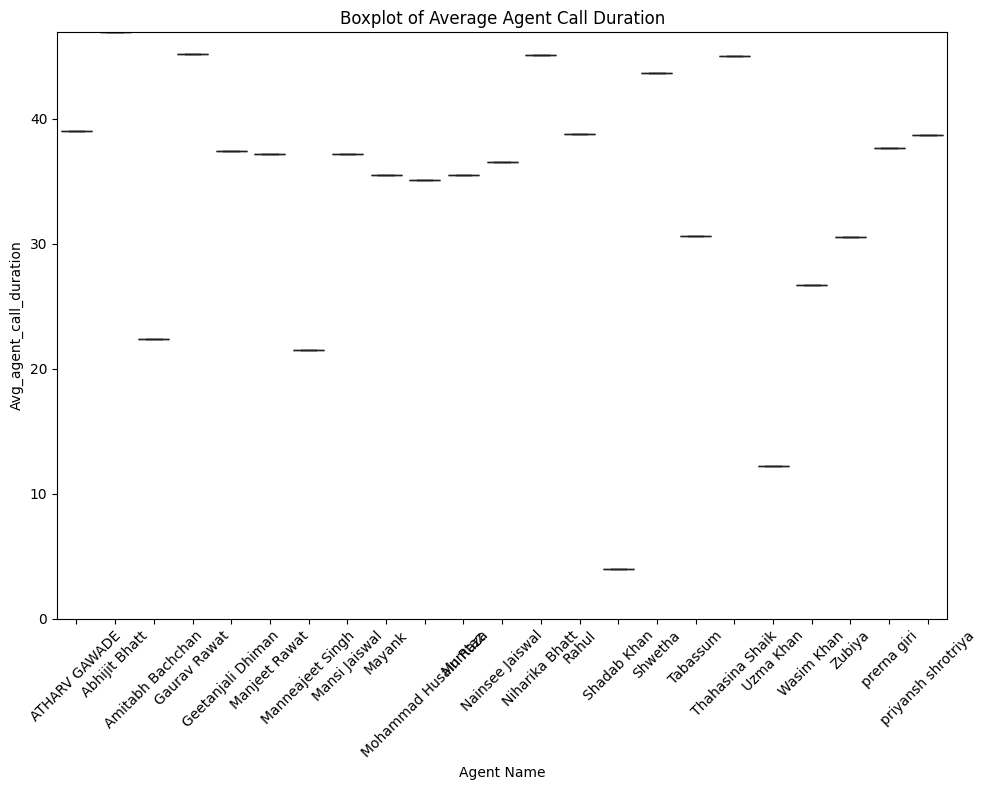

<Figure size 1600x1200 with 0 Axes>

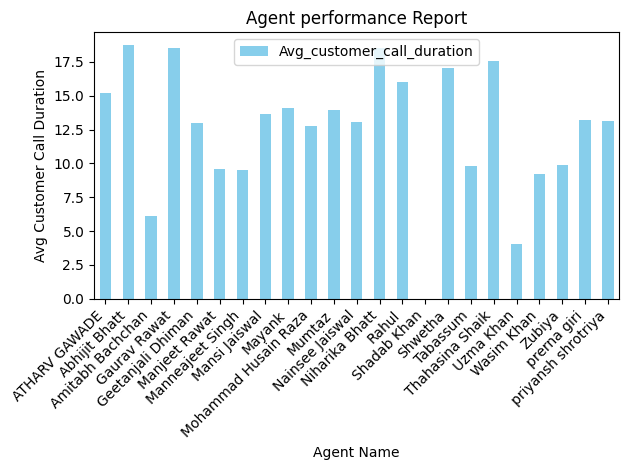

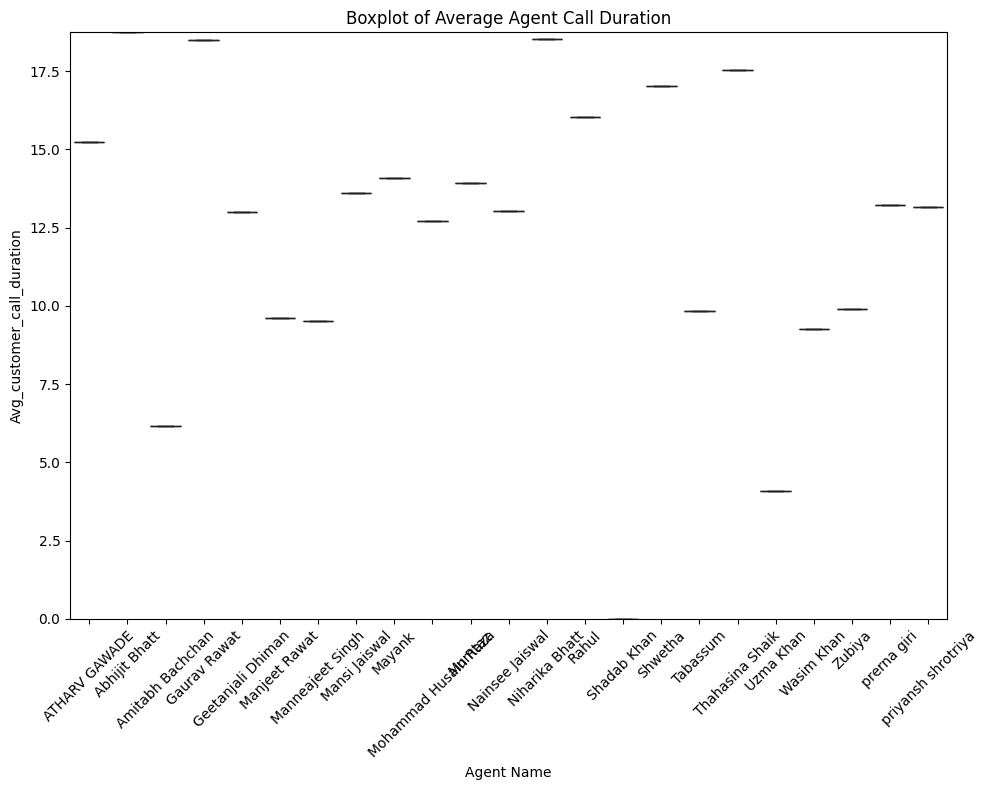

              Agent Name  no_of_calls  calls_connected  leads_converted  \
0          ATHARV GAWADE          386              132               31   
1          Abhijit Bhatt         1147              434              142   
2       Amitabh Bachchan          999              201              117   
3           Gaurav Rawat           44               13                8   
4      Geetanjali Dhiman          533              130               46   
5          Manjeet Rawat          668              224               69   
6       Manneajeet Singh           27               11                4   
7          Mansi Jaiswal         4134             1553              699   
8                 Mayank           57               20                5   
9   Mohammad Husain Raza          750              247               97   
10                Mumtaz         2453              916              374   
11       Nainsee Jaiswal         4372             1491              685   
12        Niharika Bhatt 

In [68]:
agent_performance= df.groupby('Agent Name').agg(no_of_calls=('Call Status', 'count'), calls_connected=('Call Status', lambda x:(x=='completed').sum()),
                                                leads_converted=('Lead Status', lambda x:(x=='Interested').sum()),  Avg_agent_call_duration= ('Agent Duration(seconds)', 'mean'),
                                                Avg_customer_call_duration=('Customer Duration(seconds)', 'mean')).reset_index()

performance_columns=['no_of_calls', 'calls_connected','leads_converted', 'Avg_agent_call_duration','Avg_customer_call_duration']

for columns in performance_columns:
    plt.figure(figsize=(16,12))
    agent_performance.plot(kind="bar",x='Agent Name',y=columns,stacked=True,color='skyblue')
    plt.title("Agent performance Report")
    plt.xlabel('Agent Name')
    plt.ylabel(columns.replace('_', ' ').title())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='Agent Name', y=columns, data=agent_performance,hue='Agent Name', palette='viridis')
    plt.title('Boxplot of Average Agent Call Duration')
    plt.xlabel('Agent Name')
    plt.ylabel(columns)
    plt.ylim(0, agent_performance[columns].max())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


print(agent_performance)





In [ ]:
Explaination:
Metrics:
Number of Calls (no_of_calls):

This metric indicates the total number of calls made by each agent.
It reflects the agent's activity level and effort in making calls.

Calls Connected (calls_connected):

Represents the number of calls that were successfully connected, i.e., calls with a status of "completed".
It measures the agent's effectiveness in reaching and connecting with the other party.

Leads Converted (leads_converted):

Shows the number of calls where the lead status changed to "Interested".
It signifies the agent's success in converting calls into potential leads or prospects.

Average Agent Call Duration (Avg_agent_call_duration):

This metric calculates the average duration of calls handled by each agent.
It provides insights into the agent's efficiency in handling calls and engaging with leads or customers.

Average Customer Call Duration (Avg_customer_call_duration):

Represents the average duration of customer-side calls.
It gives an indication of the duration of interactions from the customer's perspective.


In [ ]:
Additional Recommendations:

CAMPAIGN PERFROMANCE REPORT:
1. Implement strategies to reduce lost calls due to no answer, such as better timing, increased follow-ups, or automated callback options.
2. Understand what makes these campaigns successful and replicate these strategies in other campaigns.
3. Investigate the reasons behind longer agent and customer call durations to understand their impact on campaign success.
4. Optimize agent workload and resource allocation based on these insights.

LEAD DISPOSITION REPORT:
1.Allocate more resources and efforts towards these campaigns to maximize lead conversion.Analyze the successful strategies 
    used in these campaigns to replicate them in other campaigns.
2.Implement better timing and follow-up strategies to increase the number of answered calls.Use analytics to determine the 
    best times to contact leads.
3.While a smaller issue, consider adjusting call times or improving scheduling to contact busy leads more effectively.
4.Improve targeting to reduce the number of leads not interested in the offerings.

AGENT PERFORMANCE REPORT:
1.Analyze call duration patterns to identify the optimal length for productive conversations.
2.Implement strategies to increase the number of calls connected and minimize call durations without compromising quality.
3.Continuously monitor agent performance metrics to track progress and make adjustments as needed.
4.Use data-driven insights to refine agent workflows and optimize resource allocation.